In [1]:
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [41]:
reviews = pd.read_csv('C:\\Users\\eeron\\Python\\all_critic_reviews_2019.csv', encoding = "ISO-8859-1")
reviews['category'] = ['positive' if s> 60 else 'neutral' if s<=60 and s>=40 else 'negative' for s in reviews.score]
reviews.head() #>60 is good, 60-40 is medium, <40 is bad

,artist,album,reviewer,score,review,category
0,Nick Cave & the Bad Seeds,Ghosteen,Record Collector,100,It can only tower when it comes to naming this...,positive
1,Nick Cave & the Bad Seeds,Ghosteen,Mojo,100,"It still vibrates with Warren Ellis's ominous,...",positive
2,Nick Cave & the Bad Seeds,Ghosteen,The A.V. Club,100,He sounds simultaneously alone at the edge of ...,positive
3,Nick Cave & the Bad Seeds,Ghosteen,musicOMH.com,100,"Yes, it can be painful, but theres a beautifu...",positive
4,Nick Cave & the Bad Seeds,Ghosteen,Classic Rock Magazine,100,Ghosteen is an album which raises the bar in t...,positive


In [42]:
cvect = CountVectorizer(max_features = 1000, stop_words = ENGLISH_STOP_WORDS)
cvect.fit(reviews.review)
X_bow = cvect.transform(reviews.review)

In [43]:
X_bow_df = pd.DataFrame(X_bow.toarray(), columns = cvect.get_feature_names())
X_bow_df.head()

,10,106,108,11,110,111,112,113,114,115,...,worth,worthy,writing,written,wrong,year,years,yes,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_bow_df.sum().nlargest(10) #we can consider adding some of these generic words to our stopword using ENGLISH_STOP_WORDS.union([list of words])

album     1723
2019      1149
like       927
record     723
songs      684
music      565
band       493
sound      481
new        464
pop        444
dtype: int64

In [45]:
y = reviews.category
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bow_df, y, test_size = 0.2, random_state = 7)

In [46]:
bow_lr = LogisticRegression().fit(Xb_train, yb_train)
yb_predict = bow_lr.predict(Xb_test)

C:\Users\eeron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eeron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
print('Accuracy on train set: ', bow_lr.score(Xb_train, yb_train))
print('Accuracy on test set: ', bow_lr.score(Xb_test, yb_test))
print('Confusion matrix: \n' , confusion_matrix(yb_test, yb_predict)/len(yb_test))

Accuracy on train set:  0.8758409785932721
Accuracy on test set:  0.7995110024449877
Confusion matrix: 
 [[0.         0.000815   0.00162999]
 [0.         0.02689487 0.15484923]
 [0.         0.04319478 0.77261614]]


[[0.77261614 0.04319478 0.        ]
 [0.15484923 0.02689487 0.        ]
 [0.00162999 0.000815   0.        ]]


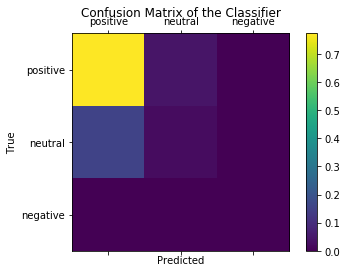

In [49]:
labels = ['positive','neutral','negative']
cm = confusion_matrix(yb_test, yb_predict, labels)/len(yb_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix of the Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
tfvect = TfidfVectorizer(max_features = 1000, stop_words = ENGLISH_STOP_WORDS)
tfvect.fit(reviews.review)
X_tf = tfvect.transform(reviews.review)

In [51]:
X_tf_df = pd.DataFrame(X_tf.toarray(), columns = tfvect.get_feature_names())
X_tf_df.head()

,10,106,108,11,110,111,112,113,114,115,...,worth,worthy,writing,written,wrong,year,years,yes,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.383527,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.371136,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [52]:
y = reviews.category
Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(X_tf_df, y, test_size = 0.2, random_state = 7)

In [53]:
tf_lr = LogisticRegression(multi_class = 'ovr', solver  = 'lbfgs', max_iter = 1000).fit(Xtf_train, ytf_train)
ytf_predict = tf_lr.predict(Xtf_test)

In [54]:
print('Accuracy on train set: ', tf_lr.score(Xtf_train, ytf_train))
print('Accuracy on test set: ', tf_lr.score(Xtf_test, ytf_test))
print('Confusion matrix: \n' , confusion_matrix(ytf_test, ytf_predict)/len(ytf_test)) #looks like tfidf gives us a better fit out of the box

Accuracy on train set:  0.8417940876656473
Accuracy on test set:  0.8198859005704972
Confusion matrix: 
 [[0.         0.         0.00244499]
 [0.         0.00488998 0.17685412]
 [0.         0.000815   0.81499593]]


[[0.81499593 0.000815   0.        ]
 [0.17685412 0.00488998 0.        ]
 [0.00244499 0.         0.        ]]


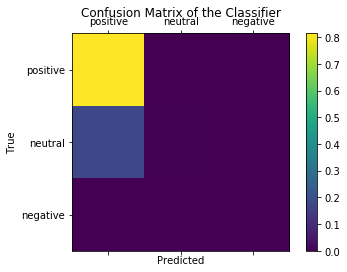

In [55]:
labels = ['positive','neutral','negative']
cm = confusion_matrix(ytf_test, ytf_predict, labels)/len(ytf_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix of the Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [56]:
C = [10 ** i for i in range (-4,4)] #LogisticRegression uses l2 regularization by default, let's explore hyperparameters
test_scores = []

In [57]:
for c in C:
    _tf_lr = LogisticRegression(C = c, multi_class = 'ovr', solver  = 'lbfgs', max_iter = 1000).fit(Xtf_train, ytf_train)
    test_scores.append(_tf_lr.score(Xtf_test, ytf_test))

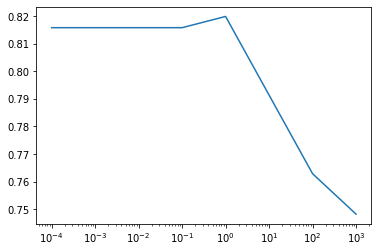

In [58]:
plt.plot(C, test_scores)
plt.xscale('log')
plt.show() #looks like C~1 is optimal

next steps: dataset is skewed look at probability of classes and why we aren't predicting negative reviews accurately, experiment with adding more stop words, optimize number of features, score individual words on sentiment and input those as features, use cross-validation, use more data

In [59]:
reviews.groupby('category').count() #definitely not enough negative reviews here to predict accurately, we might try looking at user reviews instead

,artist,album,reviewer,score,review
category,,,,,
negative,38,38,38,38,38
neutral,989,989,989,989,989
positive,5105,5105,5105,5105,5105


There are not enough reviews here to accurately predict the negative review class. We may want to try user reviews as they may be more candid don't have a professional interest in their rating or tone of their review. In the meantime let's try lumping negative and neutral together and predicting a binary class.

In [64]:
reviews['binary_category'] = ['positive' if s> 60 else 'neutral-negative' for s in reviews.score]

In [71]:
tfvect_bc = TfidfVectorizer(max_features = 1000, stop_words = ENGLISH_STOP_WORDS)
tfvect_bc.fit(reviews.review)
X_tf_bc = tfvect_bc.transform(reviews.review)
X_tf_df_bc = pd.DataFrame(X_tf_bc.toarray(), columns = tfvect_bc.get_feature_names())
y_bc = reviews.binary_category
Xtfbc_train, Xtfbc_test, ytfbc_train, ytfbc_test = train_test_split(X_tf_df_bc, y_bc, test_size = 0.2, random_state = 7)

In [72]:
tf_lr_bc = LogisticRegression(solver = 'lbfgs', max_iter = 1000).fit(Xtfbc_train, ytfbc_train)
ytfbc_predict = tf_lr_bc.predict(Xtfbc_test)

In [73]:
print('Accuracy on train set: ', tf_lr_bc.score(Xtfbc_train, ytfbc_train))
print('Accuracy on test set: ', tf_lr_bc.score(Xtfbc_test, ytfbc_test))
print('Confusion matrix: \n' , confusion_matrix(ytfbc_test, ytfbc_predict)/len(ytfbc_test)) #looks like tfidf gives us a better fit out of the box

Accuracy on train set:  0.8432212028542304
Accuracy on test set:  0.8190709046454768
Confusion matrix: 
 [[0.00570497 0.17848411]
 [0.00244499 0.81336593]]


[[0.81336593 0.00244499]
 [0.17848411 0.00570497]]


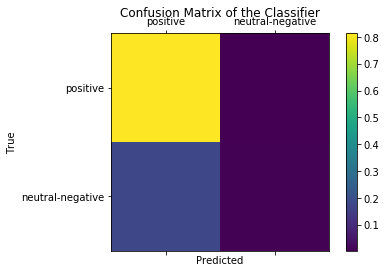

In [75]:
labels = ['positive','neutral-negative']
cm = confusion_matrix(ytfbc_test, ytfbc_predict, labels)/len(ytfbc_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix of the Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Looks like we are just predicting everything as positive, maybe due to the skew of the data set?